<a href="https://colab.research.google.com/github/ygh1025/demo-repo/blob/main/chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Concatenate,InputLayer
from keras import Sequential,Model,Input,datasets,optimizers,Input
#from keras.optimizers import SGD

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_valid,x_act_train=x_train[:5000]/255.0,x_train[5000:]/255.
y_valid,y_act_train=y_train[:5000],y_train[5000:]


In [ ]:
x_act_train.shape

(55000, 28, 28)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model=Sequential([
                  Flatten(input_shape=[28,28]),
                  Dense(128,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden2=model.layers[2]

In [ ]:
hidden2.name

'dense_1'

In [ ]:
model.get_layer('dense')

In [ ]:
weights,bias=hidden1.get_weights()

In [ ]:
weights.shape

(784, 128)

In [ ]:
bias.shape

(128,)

In [ ]:
hist=model.fit(x_act_train,y_act_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7663 - accuracy: 0.7488 - val_loss: 0.6077 - val_accuracy: 0.7882
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5039 - accuracy: 0.8239 - val_loss: 0.5176 - val_accuracy: 0.8108
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4587 - accuracy: 0.8375 - val_loss: 0.4236 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4325 - accuracy: 0.8479 - val_loss: 0.4172 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4120 - accuracy: 0.8558 - val_loss: 0.3965 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8602 - val_loss: 0.3867 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3811 - accuracy: 0.8653 - val_loss: 0.3756 - val_accuracy:

In [ ]:
model.evaluate(x_test/255.,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8804


[0.34051278233528137, 0.8804000020027161]

In [ ]:
x_new=x_test[:3]
x_new.shape

(3, 28, 28)

In [ ]:
prob=model.predict_(x_new)
prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [ ]:
np.nonzero(prob)[1]

array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()
train_full_x,test_x,train_full_y,test_y=train_test_split(housing.data,housing.target)
train_x,valid_x,train_y,valid_y=train_test_split(train_full_x,train_full_y)

In [ ]:
scale=StandardScaler()
X_train=scale.fit_transform(train_x)
valid_x=scale.transform(valid_x)
test_x=scale.transform(test_x)

In [ ]:
X_train.shape[1]

8

In [ ]:
model=Sequential([
      Dense(32,activation='relu',input_shape=[X_train.shape[1]]),
      Dense(1)
])
model.compile(loss='mse',optimizer='sgd')
model.fit(X_train,train_y,epochs=40,validation_data=(valid_x,valid_y))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.9373 - val_loss: 0.5870
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5103 - val_loss: 0.5134
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4722 - val_loss: 0.4896
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4573 - val_loss: 0.4754
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4648 - val_loss: 0.4650
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4320 - val_loss: 0.4573
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4240 - val_loss: 0.4480
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4187 - val_loss: 0.4415
Epoch 9/40
363/363 [==============================] - 1s 3ms/step - loss: 0.4132 - val_loss: 0.4354
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4053 - val_loss: 0.4335

In [ ]:
model.evaluate(test_x,test_y)

162/162 [==============================] - 1s 4ms/step - loss: 0.3371


0.3371385335922241

In [ ]:
input=Input(shape=X_train.shape[1])
X=Dense(32,activation='relu')(input)
X=Dense(16,activation='relu')(X)
X=Concatenate()([input,X])
X=Dense(1)(X)
model1=Model(inputs=input,outputs=X)
model1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 32)           288         ['input_7[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 16)           528         ['dense_15[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 24)           0           ['input_7[0][0]',                
                                                                  'dense_16[0][0]']         

In [ ]:
model1.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(5e-3))
model1.fit(X_train,train_y,epochs=40,validation_data=(valid_x,valid_y))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 136.9255 - val_loss: 99.3935
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 100.6537 - val_loss: 72.2123
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 78.9958 - val_loss: 50.5148
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 53.8504 - val_loss: 35.7979
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 37.6822 - val_loss: 26.9915
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 28.9694 - val_loss: 23.0348
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 20.4990 - val_loss: 13.8983
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 13.3726 - val_loss: 11.2335
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 10.4028 - val_loss: 7.2401
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 8.7217

In [ ]:
valid_x.shape

(3870, 8)

In [ ]:
test_x.shape

(5160, 8)

In [ ]:
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=valid_x[:,:5],valid_x[:,2:]
X_test_A,X_test_B=test_x[:,:5],test_x[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]


In [ ]:
inputA=Input(shape=5)
inputB=Input(shape=X_train_B.shape[1])
XB=Dense(32,activation='relu')(inputB)
XB=Dense(16,activation='relu')(XB)
XAB=Concatenate()([inputA,XB])
out=Dense(1)(XAB)
model=Model(inputs=[inputA,inputB],outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           224         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['dense[0][0]']                  
                                                                                              

In [ ]:
model.compile(loss='mse',loss_weight=[0.9,0.1],optimizer=tf.keras.optimizers.SGD(5e-3))
model.fit([X_train_A,X_train_B],train_y,epochs=20,validation_data=([X_valid_A,X_valid_B],valid_y))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.1801 - val_loss: 1.0708
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6173 - val_loss: 0.5574
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5283 - val_loss: 0.5041
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4946 - val_loss: 0.4720
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4761 - val_loss: 0.4530
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4575 - val_loss: 0.4373
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4472 - val_loss: 0.4247
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4386 - val_loss: 0.4222
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4331 - val_loss: 0.4139
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4283 - val_loss: 0.4068

In [ ]:
inputA=Input(shape=5)
inputB=Input(shape=X_train_B.shape[1])
XB=Dense(32,activation='relu')(inputB)
XB=Dense(16,activation='relu')(XB)
XAB=Concatenate()([inputA,XB])
out=Dense(1)(XAB)
Aux_out=Dense(1)(XB)
model_c=Model(inputs=[inputA,inputB],outputs=[out,Aux_out])
model_c.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           224         ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 16)           528         ['dense_3[0][0]']                
                                                                                            

In [ ]:
model_c.compile(loss='mse',loss_weights=[0.9,0.1],optimizer=tf.keras.optimizers.SGD(5e-3))
model_c.fit([X_train_A,X_train_B],[train_y,train_y],epochs=20,validation_data=([X_valid_A,X_valid_B],[valid_y,valid_y]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4061 - dense_5_loss: 1.3326 - dense_6_loss: 2.0677 - val_loss: 1.7552 - val_dense_5_loss: 1.7564 - val_dense_6_loss: 1.7451
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8033 - dense_5_loss: 0.7645 - dense_6_loss: 1.1523 - val_loss: 0.6056 - val_dense_5_loss: 0.5600 - val_dense_6_loss: 1.0158
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5942 - dense_5_loss: 0.5552 - dense_6_loss: 0.9457 - val_loss: 0.5416 - val_dense_5_loss: 0.5040 - val_dense_6_loss: 0.8806
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5403 - dense_5_loss: 0.5078 - dense_6_loss: 0.8331 - val_loss: 0.5076 - val_dense_5_loss: 0.4774 - val_dense_6_loss: 0.7796
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5105 - dense_5_loss: 0.4835 - dense_6_loss: 0.7533 - val_loss: 0.4890 - val_dense_5_loss: 0.4632 - val_dense_6_loss: 0.7216


In [ ]:
total_loss,main_loss,aux_loss=model_c.evaluate([X_test_A,X_test_B],[test_y,test_y])

NameError: ignored

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train.reshape(-1,784)/255.
x_test=x_test.reshape(-1,784)/255.

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if logs.get('accuracy') is not None and logs.get('accuracy')>=0.9:
      print('the goal reaches 99.9% and has to stop!')
      self.model.stop_training=True

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if logs.get('accurcay') is not None and logs.get('accuracy')>=0.9:
      print('the training reach the goal 98% and training stops!')
      self.model.stop_training=True

In [ ]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/40))
'''tf.keras.backend.clear_session()
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if logs.get('accurcay') is not None and logs.get('accuracy')>=0.900:
      print('the training reach the goal 98% and training stops!')
      self.model.stop_training=True'''
model_mnist=Sequential([
          Dense(128,activation='relu',input_shape=[x_train.shape[1]]),
          Dense(64,activation='relu'),
          Dense(10,activation='softmax')
])
model_mnist.summary()
model_mnist.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.015),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if logs.get('accuracy') is not None and logs.get('accuracy')>0.9:
      print('stop!')
      self.model.stop_training=True
check_points=tf.keras.callbacks.ModelCheckpoint('my_best_mnist_model.h5',save_best_only=True)
early_stop=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
hist=model_mnist.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[check_points,early_stop])

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5342 - accuracy: 0.8542 - val_loss: 0.2832 - val_accuracy: 0.9213
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9252 - val_loss: 0.2186 - val_accuracy: 0.9372
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2063 - accuracy: 0.9408 - val_loss: 0.1880 - val_accuracy: 0.9444
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1718 - accuracy: 0.9500 - val_loss: 0.1609 - val_accuracy: 0.9517
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1481 - accuracy: 0.9571 - val_loss: 0.1400 - val_accuracy: 0.9592
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1292 - accuracy: 0.9626 - val_loss: 0.1277 - val_accuracy: 0.9629
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1147 - accuracy: 0.9673 - val_loss: 0.1159 - val_ac

In [ ]:
model_mnist.save('my_minist_model.h5')

In [ ]:
ls

my_best_mnist_model.h5  sample_data/


In [ ]:
model_mnist.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9762


[0.08055685460567474, 0.9761999845504761]

In [ ]:
my_best_model=keras.models.load_model('my_best_mnist_model.h5')

In [ ]:
my_best_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9783


[0.07235735654830933, 0.9782999753952026]

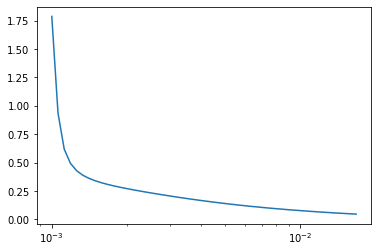

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(hist.history['lr'],hist.history['loss'])


In [ ]:
def build_model(n_hidden=1,n_neurons=64,learning_rate=3e-3,input_shape=8):
  model=Sequential()
  model.add(InputLayer(input_shape=input_shape))
  for layers in range(n_hidden):
    model.add(Dense(n_neurons,activation='relu'))
  model.add(Dense(1))
  optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [ ]:
keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
keras_reg.fit(X_train,train_y,epochs=100,validation_data=(valid_x,valid_y),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4566 - val_loss: 0.6696
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6830 - val_loss: 0.5850
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5950 - val_loss: 0.5240
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.4928
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5164 - val_loss: 0.4748
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4981 - val_loss: 0.4615
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4869 - val_loss: 0.4505
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4768 - val_loss: 0.4440
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4700 - val_loss: 0.4390
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4625 - val_lo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param={'n_hidden':[1,2,3],'n_neurons':[32,64,128],'learning_rate':[3e-3,4e-3,8e-3]}
sea_cv=RandomizedSearchCV(keras_reg,param,n_iter=10,cv=3)
sea_cv.fit(X_train,train_y,epochs=100,validation_data=(valid_x,valid_y),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
                                                             

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4026 - val_loss: 2.7851
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 7.1172 - val_loss: 3.5013
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 2.1380 - val_loss: 0.4301
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4292 - val_loss: 0.4013
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4034 - val_loss: 0.3935
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3867 - val_loss: 0.3782
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3757 - val_loss: 0.3666
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3694 - val_loss: 0.3631
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3612 - val_loss: 0.3542
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3556 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f920865d650>,
                   param_distributions={'learning_rate': [0.003, 0.004, 0.008],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': [32, 64, 128]})

In [ ]:
sea_cv.best_params_

{'learning_rate': 0.004, 'n_hidden': 3, 'n_neurons': 64}